# The Embedding Notebook 4
## John E. Inglesfield
This is the fourth embedding notebook, providing short computer programs to illustrate the embedding method, and to accompany my book *The Embedding Method for Electronic Structure* (ebook ISBN 978-0-7503-1042-0, print ISBN 978-0-7503-1043-7), published in the *Expanding Physics* ebook program by [IOP Publishing](http://iopscience.iop.org/books/iop-expanding-physics). As with the earlier notebooks, this can be used independently of the book, but the references are to chapters, figures, and equations. Atomic units are used throughout, with $e=\hbar=m_e=1$.

This notebook uses the `numpy` and `matplotlib` modules, as well as the `kink_class.py` module in the repository, which itself uses `numpy`, `scipy`, `cmath`, and `matplotlib`. It also imports `warnings`, to filter out occasional harmless warnings from `matplotlib`. I have tried to use the Python class structure within `kink_class`, which simplifies the structure of the code. The modules we need are loaded in the following cell.

As this notebook enables us to study the transmission properties of different shaped kinks between straight waveguides, it's useful to compare the figures. All the figures are output in a single pdf file, which you can rename in the following cell.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import kink_class as kink
%matplotlib inline
pp = PdfPages('figures_nb4.pdf')  # sets up pdf file for figures - name can be changed
size = 6  # figure size, which can be changed

## Chapter 7 The embedding potential and electron transport (continued)
This notebook is a continuation of Notebook 3, illustrating how the embedding potential $\Sigma$ enters electron transport, with a variety of waveguide kinks. This allows us to see how the shape of the kink affects transport, the appearance of bound states and resonances, and allows us to explore the concept of left and right densities of states. The different shapes of kink which we can use are shown in this figure:
<img src=kinks.png width=600 height=600 />
We can control the exact shape of the kink with suitable input parameters, as we shall see. The kink connects straight horizontal sections of waveguide on opposite sides of the cyan-dashed square in the following figure, which corresponds to case (a):
<img src=kink_fig.png width=400 height=400 />
As in notebooks 2 and 3, we solve the Schrödinger equation explicitly in region I, the grey region in the figure, adding the confining embedding potential over the sides of the kink indicated in red, and embedding on to the straight waveguides over the blue lines in the figure. It is convenient to use coordinates, $x,y$, shown in cyan, to define the sides of the kink: the lower side of the kink is given by the function $g(x)$, and the upper by $h(x)$, with $0<x<a$.   
The basis functions are the same as in notebook 3, defined with respect to the $\hat{x},\hat{y}$ coordinates, with their origin at the corner of the magenta-dashed square,
$$\chi_{pq}(\hat{x},\hat{y})=\cos(p\pi \hat{x}/D)\cos(q\pi \hat{y}/D),\quad p,q=0,1,2\ldots,$$
with $D>a$ to achieve flexibility of boundary conditions over the limits of region I. Nevertheless, we should aim for region I to occupy a fair fraction of the area over which the basis functions are defined (that is, the area contained by the dashed magenta square), to avoid problems of over-completeness.

In the following cell we input the basic parameters $a$ and $D$, defined in the figure, typical values being $a=2.0$ a.u., $D=2.5$ a.u. We also *instantiate* the class `Kink`, the instance being `k`.

In [2]:
# a is the side of the square which contains the kink and D defines the basis functions
a, D = 2.0, 2.5  # can be changed
k = kink.Kink(a, D) # k is the "instance" of the class Kink.

### Defining the kink geometry
Next we set up the geometry of the kink, first choosing the value of the parameter `waveguide` which determines the type of kink shown in the first figure. 

In [3]:
waveguide = int(raw_input('Which functions describe waveguide? '))

Which functions describe waveguide? 0


Depending on the type of kink, we need the parameters to describe the functions $g(x)$ and $h(x)$.  
For `waveguide=0`, type (a), $g$ and $h$ have the form, $g(x)=g_0+g'x,\;h(x)=h_0+h'x$,  
where the parameters $g_0, h_0, g', h'$ are input as `g_zero, h_zero, g_slope, h_slope`.  
These control the values at $x=0$ and the slope of the lines defining the kink, and are set in the following cell; the values can be changed, though we require $0\le g(x) \le h(x)$ and $h(x) \le a$ (this is checked later).

In [4]:
# g_zero and h_zero must be set here for ALL the kink types:
g_zero, h_zero = 0.2, 1.8  # can be changed
# g', h' parameters in kink functions type (a), waveguide = 0:
g_slope, h_slope = 0.25, -0.1    # can be changed

For `waveguide=1`, type (b), $g$ and $h$ have the form, $g(x)=g_0+\frac{w}{2}[\tanh(2x-a-\Delta)+1],\;\;h(x)=h_0+\frac{w}{2}[\tanh(2x-a+\Delta)+1],$  
**where the parameters $g_0,h_0$ are set in the cell above**, and $w,\Delta$ are input as `width, disp`. The values of $g$ and $h$ at $x=0$ are given *approximately* by $g_0$ and $h_0$, and $w$ and $\Delta$ control the height of the $\tanh$ functions, and their relative displacement. These can be set in the following cell, again with the same proviso that $0\le g(x)\le h(x)$ and $h(x)\le a$.

In [5]:
# w, Delta parameters in kink functions type (b), waveguide = 1:
width, disp = 0.5, 0.5  # can be changed

For `waveguide=2`, type (c), $g$ and $h$ are determined by the Irwin-Hall cubic spline defined in the module `kink_class` as `spline`. If we call this spline function $f(y)$, where $0\le y\le 2$, with $f(0)=f(2)=0$ and $f(1)=1$, $g$ and $h$ are given by $g(x)=g_0+u\,f(2x/a),\;\;h(x)=h_0+v\,f(2x/a)$,  
**where the parameters $g_0, h_0$ are set above**, and $u,v$ are input as `g_width, h_width`. These control the values at $x=0$ and the height of each bell-shaped function; this gives us a lot of flexibility in the shape of kink, so that as well as the shape shown in (c) ($u=v$), we can also obtain a bulge ($u$ negative, $v$ positive) or a constriction ($u$ positive, $v$ negative). $u$ and $v$ are set in the following cell, with the same proviso as before that $0\le g(x)\le h(x)$ and $h(x)\le a$.  

In [6]:
# u, v parameters in kink functions type (c), waveguide = 2:
g_width, h_width = -0.3, 0.3  # can be changed

We now set the functions $g(x)$ and $h(x)$, plotting them, and checking that they satisfy the criteria that $0\le g(x)\le h(x)$ and $h(x)\le a$. If these are not satisfied the program will stop with an assertion error; the graph will give you an indication of what is wrong, and you should change the parameters accordingly (you do not have to run the whole notebook again, just the cell containing the changed parameters and the following cell).

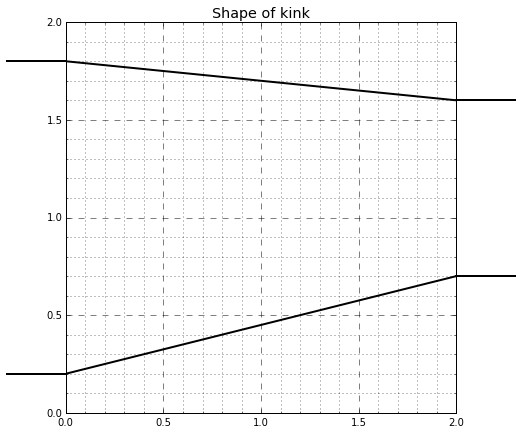

In [7]:
if waveguide == 0:
    param = [g_zero, h_zero, g_slope, h_slope]
elif waveguide == 1:
    param = [g_zero, h_zero, width, disp]
else:
    param = [g_zero, h_zero, g_width, h_width]
k.kink_define(waveguide, param)
pp.savefig()

### Calculating the Green function and the density of states
As in Notebook 3, we now evaluate the Hamiltonian and overlap integrals over region I, the area contained between $g(x)$ and $h(x)$ and the boundaries at $x=0, a$ (the shaded area in the second figure). We also evaluate the matrix elements of the confining embedding potential, involving line integrals along $g(x)$ and $h(x)$. We first set $N$, the number of basis functions $\chi_{pq}$ in each direction (remember, the total number of basis functions is $N^2$), and the confining potential $\mathcal{V}$ which is replaced by the confining embedding potential. Typical values are $N=8$, and $\mathcal{V}=1\times 10^8$ a.u., but of course you can change these as you wish to explore the behaviour of the method.  
In this cell we call the function `kink_matrices` which evaluates the integrals, and as in the earlier notebooks, the program outputs information about the progress of the integration.

In [8]:
# N is number of basis functions in each direction V is confining potential
N, V = 8, 1.0e8   # can be changed
k.kink_matrices(N, V)

n_emb = 10  # number of channels in each waveguide (see following cell)
k.kink_embed(n_emb) 

Number of integrals done =   5 x  64
Number of integrals done =  10 x  64
Number of integrals done =  15 x  64
Number of integrals done =  20 x  64
Number of integrals done =  25 x  64
Number of integrals done =  30 x  64
Number of integrals done =  35 x  64
Number of integrals done =  40 x  64
Number of integrals done =  45 x  64
Number of integrals done =  50 x  64
Number of integrals done =  55 x  64
Number of integrals done =  60 x  64
Number of integrals done =  64 x  64


To calculate the density of states we embed region I on to outgoing states in the straight waveguides to the left and right of the kink, over the blue lines in the second figure. The left/right waveguide embedding potentials have the form described in more detail in notebook 3, as a sum over channels $p$,
$$\Sigma_\mathrm{L/R}(\tilde{y},\tilde{y}')=-\frac{\textrm{i}}{w_\mathrm{L/R}}
\sum_p k_p^\mathrm{\small L/R}\sin(p\pi\tilde{y}/w_\mathrm{L/R})
\sin(p\pi\tilde{y}'/w_\mathrm{L/R}),$$
where $\tilde{y}$ is the local cooordinate along the blue line, $w_\mathrm{L/R}$ is the width of the left/right waveguide, and $k_p^\mathrm{\small L/R}$ is the left/right outgoing wavevector in the $p$'th channel. In the above cell the number of channels `n_emb` is input - we can take this to be the same in both left and right waveguides, and 10 channels is more than enough. Integrals of the channel functions $\times$ basis functions using are calculated above using the function `kink_embed`. 

We can now calculate the density of states in region I, given in terms of the Hamiltonian $H$, overlap $O$, and embedding matrices $\Sigma$ by (2.43), 
$$n_\mathrm{I}(E)=-\frac{1}{\pi}\Im\;\mathrm{tr}\,[(EO-\Sigma-H)^{-1}O]$$
(here $\Sigma$ includes the confining embedding potential as well as $\Sigma_\mathrm{L/R}$).
In this notebook we shall evaluate $n_\mathrm{I}(E)$ at energies with a small imaginary part, so that we can explore possible bound states below the bottom of the band.  
In the following cell we input the the start and end of the energy range, `en_start`, `en_end`, the imaginary part of the energy `en_im`, and the number of energy points, `number_en`. We also input `dos_range`, which is the range along the ordinate for plotting $n_\mathrm{I}$.

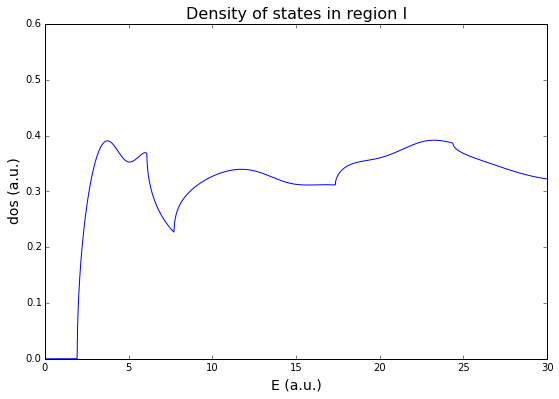

In [9]:
en_start, en_end, en_im, number_en = 0.0, 30.0, 0.0002, 2000 # start energy, end energy, imaginary part of energy,
                                                            #  number of energy points. All can be varied
dos_range = 0.6 # range of plot, which can be varied.

elist = np.linspace(en_start, en_end, number_en)
edos = np.array([k.kink_green(complex(E, en_im)) for E in elist])
fig = plt.figure(figsize=(1.5*size, size))                            
ax = fig.add_subplot(1, 1, 1)
ax.axis([en_start, en_end, 0.0, dos_range])
ax.set_xlabel('E (a.u.)', fontsize=14)
ax.set_ylabel('dos (a.u.)', fontsize=14)
ax.set_title('Density of states in region I', fontsize=16)
ax.plot(elist, edos)
pp.savefig()

Depending on the shape of the kink, a bound state may be pulled off a continuum threshold; in general this mixes with a lower continuum becoming a resonance, so that a true bound state can only appear below the lowest threshold. However if the kink has a mirror plane parallel to the waveguide (for example case (c), with a symmetric bulge), the states can be labelled as even or odd, and a bound state may have different symmetry from the continuum: in this case it remains a true bound state, superimposed on the continuum.  
Conditions for bound states and resonances are discussed in J. Timothy Londergan, John P. Carini and David P. Murdock, *Binding and Scattering in Two-Dimensional Systems* (Springer, Berlin (1999)).

### Continuum wave-function and current density
It is interesting to calculate the wave-function and its associated current density for a wave incident on the kink from a particular channel in the left-hand straight waveguide. Given an *incoming* wave-function in channel $p$, with amplitude $\psi_p(\mathbf{r}_S)$ over the left-hand boundary of the kink $S_\mathrm{L}$, the resulting wave-function in region I is given by (equation 7.21 in the book)
$$\Psi(\mathbf{r})=-2\mathrm{i}\int_{S_\mathbf{L}}\mathrm{d}\mathbf{r}_S \int_{S_\mathbf{L}}\mathrm{d}\mathbf{r}'_S G(\mathbf{r},\mathbf{r}_S) \Im\Sigma_\mathrm{L}(\mathbf{r}_S,\mathbf{r}'_S)\psi_p(\mathbf{r}'_S),$$
where $\Sigma_\mathrm{L}$ is the left waveguide embedding potential given above, and $G$ is the fully embedded Green function. The channel wave-function $\psi_p$ is given by
$$\psi_p(\mathbf{r})=\sin(p\pi\tilde{y}/w_\mathrm{L})\exp(\mathrm{i}k_p^\mathrm{\small L}\tilde{x}),$$
where $\tilde{x},\tilde{y}$ are the local waveguide coordinates (see Notebook 3 for more information). Given $\Psi(\mathbf{r})$, the current density is given by $\mathbf{J}=\Im\Psi^*\nabla\Psi$. Here the incoming current is $w_\mathrm{L}k_p^\mathrm{\small L}/2$, unlike in chapter 7 where the channel function is normalized over $S_\mathrm{L}$.  
In response to the first `raw_input` query we type the channel of the incoming wave (note the convention that the lowest channel corresponds to `input_channel = 0`, that is, $p = $ `input_channel + 1`). We are then asked in a subsequent `raw_input` query to input the energy $E$. If the condition for open channel $p$ is satisfied, that is,
$$E>\frac{p^2\pi^2}{2w_\mathrm{L}^2},$$
the wave-function and current density are plotted, otherwise we are reminded that the energy condition is not satisfied. The energy input is then repeated, and we can calculate and plot for as many energies as we like, until we type `stop` (or just `s`) to quit the loop. 

As in Notebook 3, the complex continuum wave-function is plotted in two ways, the top-left figure showing $\Re\Psi$ (coloured contours) and $\Im\Psi$ (black contour lines), and the top-right figure showing $|\Psi|$ (coloured contours) and $\arg\Psi$ (black contour lines). The colour coding is that light green represents 0 (as outside region I, where $\Psi$ is set equal to 0), with red positive and blue negative (see the colour bars). The vector field of the current density is shown using a quiver plot.

#### Note
* If you wish to repeat the calculation at a different input channel $p$, just re-run the cell.
* The value of $p$ is used as the input channel for calculating partial transmissions below.

Input channel? 0
Channel energy =  1.928
Energy of continuum state (> channel energy) 5.0


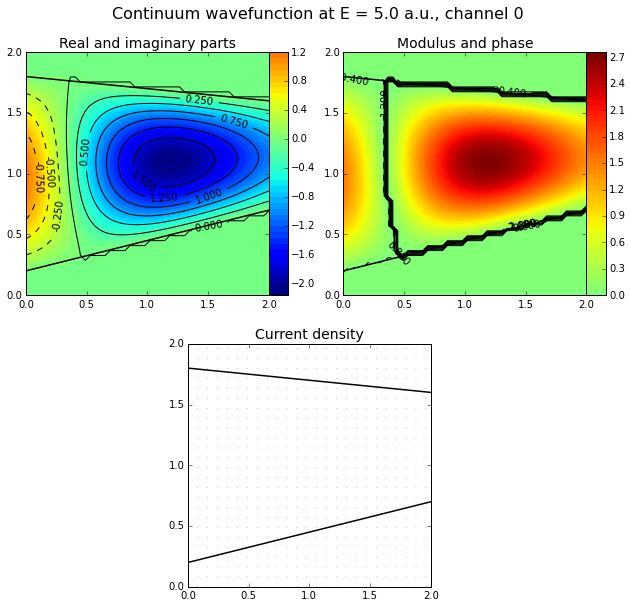

Energy of continuum state (> channel energy) 7.0


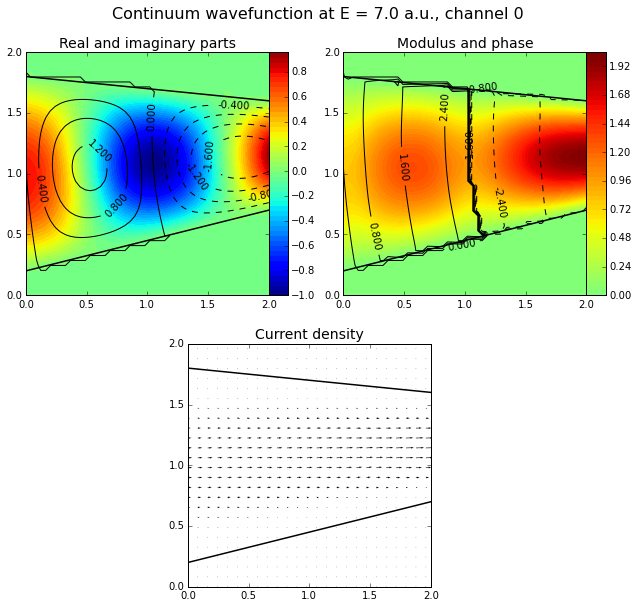

Energy of continuum state (> channel energy) 12.0


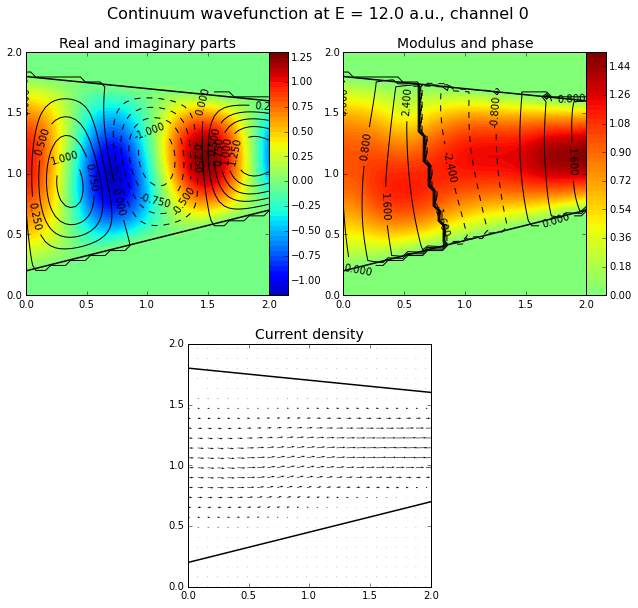

Energy of continuum state (> channel energy) s


In [10]:
input_channel = int(raw_input('Input channel? '))
E_channel = 0.5 * ((input_channel+1)*np.pi/k.w_left)**2
print '%s %.3f' % ('Channel energy = ', E_channel)
while True:
    
    en_try = raw_input('Energy of continuum state (> channel energy) ')  # OR type n to stop!
    if en_try[0] == 's':
        break
    else:
        energy = float(en_try)
        if energy > E_channel:
            k.kink_continuum_wf(energy, input_channel)
            k.kink_current_plot(1.5*size, 80)
            pp.savefig()
            plt.show()
        else:
            print 'Energy too small, try again!'

### Partial transmission probabilities
We now calculate the partial transmission probability $T_{pq}$, which gives the probability for transmission into open exit channel $q$ (into the right-hand waveguide) from input channel $p$ in the left-hand waveguide (section 5.4.2 in the book). The current in output channel $q$ can be calculated from the expression given by (7.6) in the book,
$$I_q=-2\int_{S_\mathrm{R}}\mathrm{d}\mathbf{r}_S \int_{S_\mathrm{R}}\mathrm{d}\mathbf{r}'_S \Psi(\mathbf{r}_S) \Im\Sigma^\mathrm{R}_q(\mathbf{r}_S,\mathbf{r}'_S)\Psi(\mathbf{r}'_S),$$
where the double integral is over the exit of region I, $\Psi$ is the wave-function calculated as before, and $\Sigma^\mathrm{R}_q$ is the $q$th component of the right waveguide embedding potential, given by
$$\Sigma^\mathrm{R}_q(\tilde{y},\tilde{y}')=-\frac{\textrm{i}}{w_\mathrm{R}} k_q^\mathrm{\small R}\sin(q\pi\tilde{y}/w_\mathrm{R})\sin(q\pi\tilde{y}'/w_\mathrm{R}).$$
Dividing the output current in $q$ by the input current in $p$ gives $T_{pq}$.  
To calculate $T_{pq}(E)$ we input the range of energies, the input channel $p$ being the same as in the wave-function calculations above. The number of open exit channels, `q_range` in the code, is calculated from the range of energies. The program plots $T_{pq}$ for all the open exit channels, as well as the total transmission probability from $p$, given by
$$T_p=\sideset{}{'}\sum_q T_{pq}.$$

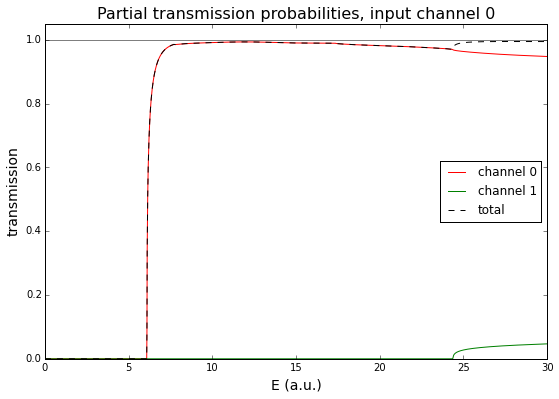

In [11]:
en_start, en_end, number_en = 0.0, 30.0, 2000 # start energy, end energy, 
# number of energy points. These can all be varied.

# If you want to change the legend position, you have various options which can be found in the documentation.
legend_position = 'best'
q_range = k.kink_transmit_output_range(en_end)
elist = np.linspace(en_start, en_end, number_en)
transmit = np.array([[k.kink_transmission(E, input_channel, 
                    output_channel) for output_channel in range(q_range)] 
                    for E in elist])
total = np.sum(transmit, axis=1)
colour = ['red', 'green', 'blue', 'cyan', 'magenta']
fig = plt.figure(figsize=(9, 6))                     # figure size can be changed
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('E (a.u.)', fontsize=14)
ax.set_ylabel('transmission', fontsize=14)
ax.set_ylim([0.0, 1.05])
ax.axhline(y=1.0, linewidth=0.5, color='black')
for q in range(q_range):
    ax.plot(elist, transmit[:,q], color=colour[q], label='channel ' + str(q))
ax.plot(elist, total, color='black', linestyle='dashed', label='total')
ax.set_title('Partial transmission probabilities, input channel '+
            str(input_channel), fontsize=16)
ax.legend(fontsize=12, loc=legend_position)
pp.savefig()

### Total transmission
We next calculate the total transmission probability of the kink, from all open input channels $p$ into all open exit channels $q$,
$$T(E)=\sideset{}{'}\sum_{pq} T_{pq}(E),$$
which can be written as a *single* formula (the Meir-Wingreen formula, section 7.1.3 of the book),
$$T=4\,\mathrm{tr}\,[G_\mathrm{RL}\,\Im\Sigma_\mathrm{L}\,G^*_\mathrm{LR}\,\Im\Sigma_\mathrm{R}].$$
Matrix multiplication is implied, and the trace is taken over the final matrix; $G_\mathrm{LR}$ is the embedded Green function in a matrix representation coupling input and exit, with $G_\mathrm{RL}=G_\mathrm{LR}$.

In the following cell we calculate $T(E)$, using the same energy range as in the calculation of partial transmission probabilities.

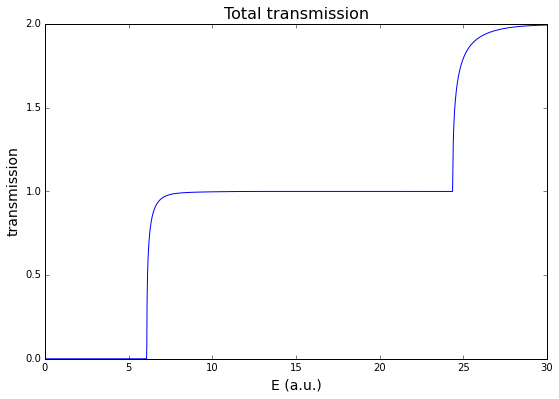

In [12]:
dos_trans = np.array([k.kink_total_transmission(E) for E in elist])
fig = plt.figure(figsize=(9, 6))            # figure size can be changed
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('E (a.u.)', fontsize=14)
ax.set_ylabel('transmission', fontsize=14)
ax.set_title('Total transmission', fontsize=16)
ax.plot(elist, dos_trans[:, 3])
pp.savefig()

### Left and right densities of states
Finally we calculate the left and right densities of states which we discussed in Notebook 3 (section 7.1.2 of the book). These correspond to the densities of states due to travelling waves incident on the kink from the left and right waveguides respectively. These are useful for calculating the charge density in non-equilibrium systems, when, for example, there is a bias voltage across region I and the Fermi energy on each side is different. These densities of states are given, in compact matrix form, by
$$n_\mathrm{I,L/R}(E)=-\frac{1}{\pi}\mathrm{tr}\,[G\,\Im\Sigma_\mathrm{L/R}G^*O],$$
where $O$ is the overlap matrix. They are calculated at the same time as $T(E)$, so all we have to do is plot them in the next cell. In Notebook 3 the circular corner was symmetric, so that the right and left densities of states were identical. Here kinks (b) and (c) are symmetric, but kink (a) can be chosen to be asymmetric, so in all cases we plot $n_\mathrm{I,L}(E)$, $n_\mathrm{I,R}(E)$, and $n_\mathrm{I,L}(E)+n_\mathrm{I,R}(E)$. The parameter `dos_range` can be changed by removing the comment hash; otherwise it is the same as in the original density of states calculation. 

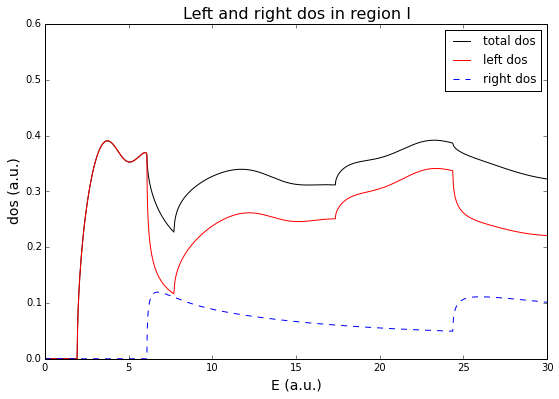

In [13]:
#dos_range = 4.0 
fig = plt.figure(figsize=(9, 6))      # figure size can be changed
ax = fig.add_subplot(1, 1, 1)
ax.axis([en_start, en_end, 0.0, dos_range])
ax.set_xlabel('E (a.u.)', fontsize=14)
ax.set_ylabel('dos (a.u.)', fontsize=14)
ax.set_title('Left and right dos in region I', fontsize=16)
ax.plot(elist, dos_trans[:, 0], label='total dos', color='black')
ax.plot(elist, dos_trans[:, 1], label='left dos', color='red')
ax.plot(elist, dos_trans[:, 2], label='right dos', color='blue', linestyle='dashed')
ax.legend(fontsize=12, loc='upper right')
pp.savefig()
pp.close()

The total density of states should be the same as before, apart from bound states, which are not picked up by this calculation. In general a bound state can only appear below the bottom of the band, but if there is a mirror plane, a true bound state may overlap the continuum (see the discussion of the density of states calculation above).